In [183]:
import thinkstats2
import thinkplot
import pandas
import statistics
import numpy as np
import statsmodels.formula.api as smf

In [94]:
# We begin by importing our 4 data sets. We're mainly going to be working with crashdata.

per_aux = pandas.read_csv('PER_AUX.CSV')
veh_aux = pandas.read_csv('VEH_AUX.CSV')
acc_aux = pandas.read_csv('ACC_AUX.CSV')
crashdata = pandas.read_csv('crashdata.csv')

In [95]:
print('Odds of accident involving someone 16-24: ',1-acc_aux['A_D16_24'].mean()/2)
print('Odds of accident involving someone 65+: ',1-acc_aux['A_D65PLS'].mean()/2)

Odds of accident involving someone 16-24:  0.13324628489709633
Odds of accident involving someone 65+:  0.09401231113598207


- A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).<br>
- Describe what the 5 variables mean in the dataset (Chapter 1).

_Variables_:

- **age**: The age of the driver at time of crash.<br>
- **sex**: Gender of the driver, 1 = Male, 2 = Female<br>
- **daysofweek**: Day of the week (1 = Sunday, 7 = Saturday, etc.)<br>
- **holiday**: 1-10 are specific holidays.<br>
- **numfatal**: Number of fatalities (this is, I think, our dependant variable.<br>

For Holiday:
1: NYD <br>
2: MLK<br>
3: President's Day<br>
4: Memorial Day<br>
5: Independence Day<br>
6: Labor Day<br>
7: Columbus Day<br>
8: Thanksgiving<br>
9: Christmas<br>
10: NYE<br>

- Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

In [96]:
ageHist = thinkstats2.Hist(crashdata.age, label='age')
sexHist = thinkstats2.Hist(crashdata.sex, label='sex')
dayHist = thinkstats2.Hist(crashdata.dayofweek, label='day of week')
holidayHist = thinkstats2.Hist(crashdata.holiday, label='holiday')
fatalHist = thinkstats2.Hist(crashdata.numfatal, label='fatalities')

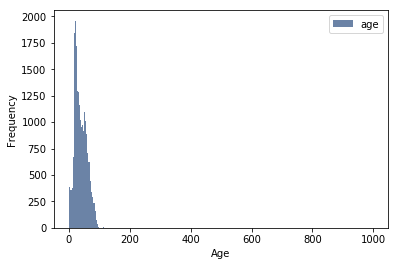

<Figure size 576x432 with 0 Axes>

In [97]:
# Age Histogram -1 Blank, 998 not reported, 999 unknown.
thinkplot.Hist(ageHist)
thinkplot.Show(xlabel = 'Age', ylabel = 'Frequency')

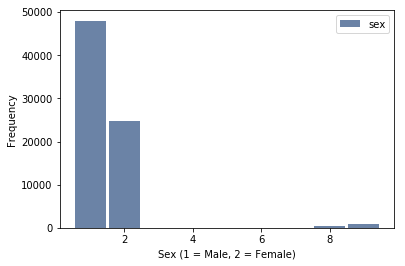

<Figure size 576x432 with 0 Axes>

In [98]:
# Sex Histogram -1 Blank, 8 not reported, 9 unknown.
thinkplot.Hist(sexHist)
thinkplot.Show(xlabel = 'Sex (1 = Male, 2 = Female)', ylabel = 'Frequency')

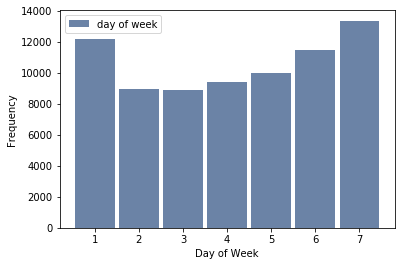

<Figure size 576x432 with 0 Axes>

In [99]:
# Days of Week Histogram -1 is Blank, 9 is unknown.
thinkplot.Hist(dayHist)
thinkplot.Show(xlabel = 'Day of Week', ylabel = 'Frequency')

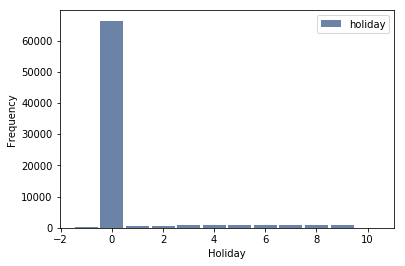

<Figure size 576x432 with 0 Axes>

In [100]:
# Holiday Histogram -1 is Blank
thinkplot.Hist(holidayHist)
thinkplot.Show(xlabel = 'Holiday', ylabel = 'Frequency')

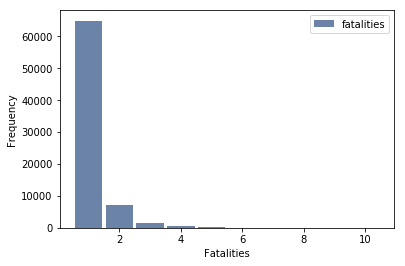

<Figure size 576x432 with 0 Axes>

In [101]:
# numfatal Histogram -1 is Blank, 99 is unknown
thinkplot.Hist(fatalHist)
thinkplot.Show(xlabel = 'Fatalities', ylabel = 'Frequency')

Age, sex, and Holidays are the only ones with any outliers and there aren't very many. In this case, we have enough data points that these few records I will take out and we'll deal with only complete datasets.

In [102]:
cleancrashdata = crashdata[crashdata.sex >=1]
cleancrashdata = cleancrashdata[cleancrashdata.sex <=2]
cleancrashdata = cleancrashdata[cleancrashdata.age >=0]
cleancrashdata = cleancrashdata[cleancrashdata.age <998]
cleancrashdata = cleancrashdata[cleancrashdata.holiday > -1]

ageHist = thinkstats2.Hist(cleancrashdata.age, label='age')
sexHist = thinkstats2.Hist(cleancrashdata.sex, label='sex')
dayHist = thinkstats2.Hist(cleancrashdata.dayofweek, label='day of week')
holidayHist = thinkstats2.Hist(cleancrashdata.holiday, label='holiday')
fatalHist = thinkstats2.Hist(cleancrashdata.numfatal, label='fatalities')


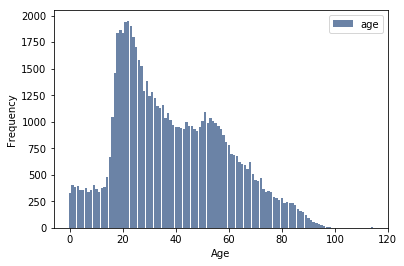

<Figure size 576x432 with 0 Axes>

In [103]:
# New Histograms:
# Age Histogram -1 Blank, 998 not reported, 999 unknown.
thinkplot.Hist(ageHist)
thinkplot.Show(xlabel = 'Age', ylabel = 'Frequency')

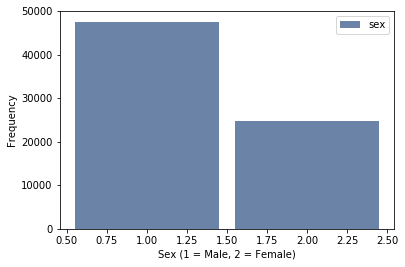

<Figure size 576x432 with 0 Axes>

In [104]:
# Sex Histogram -1 Blank, 8 not reported, 9 unknown.
thinkplot.Hist(sexHist)
thinkplot.Show(xlabel = 'Sex (1 = Male, 2 = Female)', ylabel = 'Frequency')

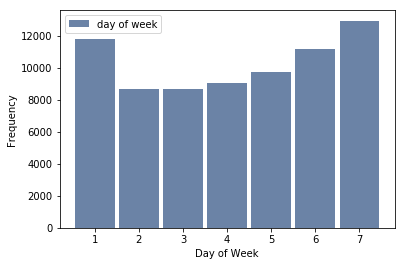

<Figure size 576x432 with 0 Axes>

In [105]:
# Days of Week Histogram -1 is Blank, 9 is unknown.
thinkplot.Hist(dayHist)
thinkplot.Show(xlabel = 'Day of Week', ylabel = 'Frequency')

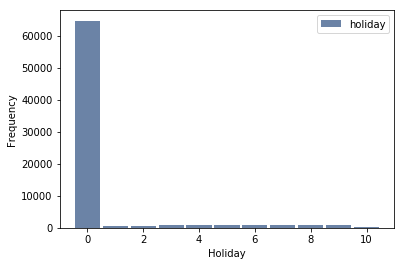

<Figure size 576x432 with 0 Axes>

In [106]:
# Holiday Histogram -1 is Blank
thinkplot.Hist(holidayHist)
thinkplot.Show(xlabel = 'Holiday', ylabel = 'Frequency')

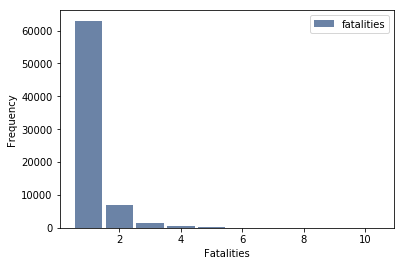

<Figure size 576x432 with 0 Axes>

In [107]:
# numfatal Histogram -1 is Blank, 99 is unknown
thinkplot.Hist(fatalHist)
thinkplot.Show(xlabel = 'Fatalities', ylabel = 'Frequency')

Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [108]:
# Age:

ageMean = statistics.mean(cleancrashdata.age)
ageSTD = statistics.variance(cleancrashdata.age) ** .5
print("Mean: ", ageMean, "\nMode: ", statistics.mode(cleancrashdata.age), "\nVariance: ",ageSTD ** 2, "\nStandard Deviation: ", ageSTD)

Mean:  38.50814066177489 
Mode:  22 
Variance:  409.94773170459064 
Standard Deviation:  20.247166016620465


In [109]:
# Sex:
sexMean = statistics.mean(cleancrashdata.sex)
sexSTD = statistics.variance(cleancrashdata.sex) ** .5
print("Mean: ", sexMean, "\nMode: ", statistics.mode(cleancrashdata.sex), "\nVariance: ",sexSTD ** 2, "\nStandard Deviation: ", sexSTD)


Mean:  1.341367852692787 
Mode:  1 
Variance:  0.2248389546602328 
Standard Deviation:  0.4741718619448362


In [110]:
# dayofweek:

dayMean = statistics.mean(cleancrashdata.dayofweek)
daySTD = statistics.variance(cleancrashdata.dayofweek) ** .5
print("Mean: ", dayMean, "\nMode: ", statistics.mode(cleancrashdata.dayofweek), "\nVariance: ",daySTD ** 2, "\nStandard Deviation: ", daySTD)


Mean:  4.130901287553648 
Mode:  7 
Variance:  4.431590196820948 
Standard Deviation:  2.1051342467455485


In [111]:
# holiday:

holidayMean = statistics.mean(cleancrashdata.holiday)
holidaySTD = statistics.variance(cleancrashdata.holiday) ** .5
print("Mean: ", holidayMean, "\nMode: ", statistics.mode(cleancrashdata.holiday), "\nVariance: ",holidaySTD ** 2, "\nStandard Deviation: ", holidaySTD)


Mean:  0.5363976187179842 
Mode:  0 
Variance:  3.172656559835944 
Standard Deviation:  1.781195261569024


In [112]:
# numfatal:

fatalMean = statistics.mean(cleancrashdata.numfatal)
fatalSTD = statistics.variance(cleancrashdata.numfatal) ** .5
print("Mean: ", fatalMean, "\nMode: ", statistics.mode(cleancrashdata.numfatal), "\nVariance: ",fatalSTD ** 2, "\nStandard Deviation: ", fatalSTD)


Mean:  1.179509898933961 
Mode:  1 
Variance:  0.31849360575976776 
Standard Deviation:  0.5643523772961072


- Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

**Answer**: I'll be comparing the number of fatalities involving occupants under 25 to everyone else to see if younger people are in more fatal accidents.

In [127]:
young = cleancrashdata[cleancrashdata.age <= 25]
rest = cleancrashdata[cleancrashdata.age > 25]

youngPMF = thinkstats2.Pmf(young.numfatal, label='youth')
restPMF = thinkstats2.Pmf(rest.numfatal, label = 'rest')

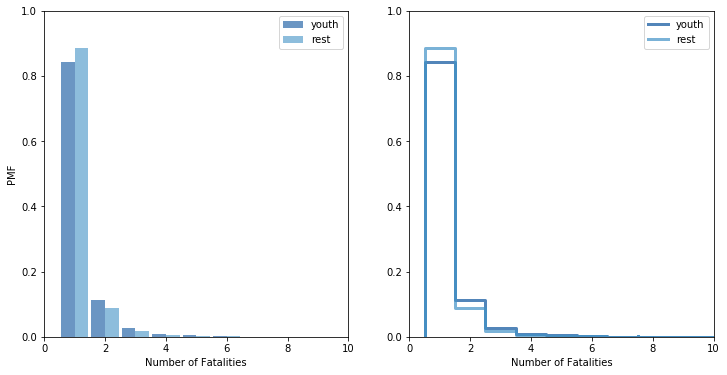

In [133]:
width = .45
axis = [0, 10, 0, 1]

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(youngPMF, align='right', width=width)
thinkplot.Hist(restPMF, align='left', width=width)
thinkplot.Config(xlabel='Number of Fatalities', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([youngPMF, restPMF])
thinkplot.Config(xlabel='Number of Fatalities', axis=axis)

Based on our PMFs here, it does seem like younger occupants are less likely to be involved in single-fatality crashes, but for more than one fatality younger people are more likely to be involved.

- Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

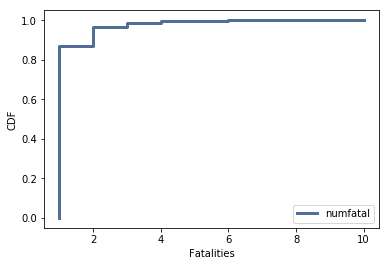

<Figure size 576x432 with 0 Axes>

In [134]:
fatalCDF = thinkstats2.Cdf(cleancrashdata.numfatal, label = 'numfatal')
thinkplot.Cdf(fatalCDF)
thinkplot.Show(xlabel = 'Fatalities', ylabel = 'CDF')

As we can see here, fatalities are quite likely to be single fatalities as opposed to multiple fatalities. However, from our PDF earlier, it does look like younger people are more likely to be involved in multiple fatality crashes.

- Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In this situation, I think the exponential distribution is most likely going to be useful for our dataset. We will plot it as follows:

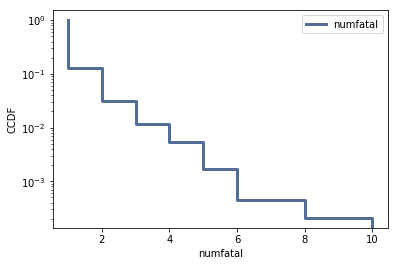

<Figure size 576x432 with 0 Axes>

In [135]:
thinkplot.Cdf(fatalCDF, complement = True)
thinkplot.Show(xlabel = "numfatal", ylabel = 'CCDF', yscale = 'log')

The slope is mostly a straight line, adjusting for the stepwise function it's fairly linear for most of it. The other CDF shape that resembles our data is the Pareto Distribution. Graphing the CDF on a log scale on both the x and y axis for a Pareto distribution results in a straight line.

Alternatively, let's look at the Pareto Distribution.

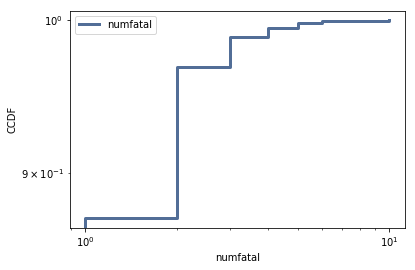

<Figure size 576x432 with 0 Axes>

In [136]:
thinkplot.Cdf(fatalCDF)
thinkplot.Show(xlabel = "numfatal", ylabel = 'CDF', yscale = 'log', xscale = 'log')

Doesn't particularly look like a straight line. I think the exponential distribution is the best model fit we are going to find.

- Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [143]:
def Jitter(values, jitter = .5):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

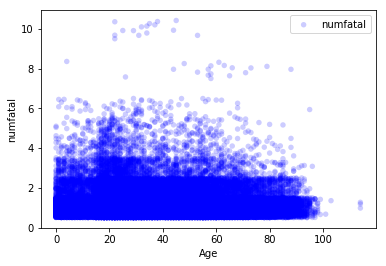

<Figure size 576x432 with 0 Axes>

In [162]:
ageJ = Jitter(cleancrashdata.age, 1)
numfatalJ = Jitter(cleancrashdata.numfatal, .5)

thinkplot.Scatter(cleancrashdata.age, numfatalJ, alpha = .2)
thinkplot.Show(xlabel = 'Age', ylabel = 'numfatal')

Based on the scatter plot, there does seem to be a concentration around age 20 where the number of fatality increases. The most fatalities recorded occur between 60 and 20 years old.

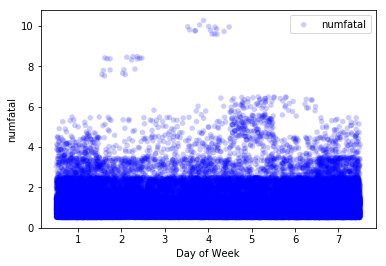

<Figure size 576x432 with 0 Axes>

In [161]:
dayofweekJ = Jitter(cleancrashdata.dayofweek, .5)

thinkplot.Scatter(dayofweekJ, numfatalJ, alpha = .2)
thinkplot.Show(xlabel = 'Day of Week', ylabel = 'numfatal')

There is an uptick on Thursday, of all days. Generally, Friday Saturday and Sunday see the expected uptick but the Thursday is interesting.

In [166]:
cov1 = thinkstats2.Cov(cleancrashdata.age, cleancrashdata.numfatal)
cov2 = thinkstats2.Cov(cleancrashdata.dayofweek, cleancrashdata.numfatal)

corr1 = thinkstats2.Corr(cleancrashdata.age, cleancrashdata.numfatal)
corr2 = thinkstats2.Corr(cleancrashdata.dayofweek, cleancrashdata.numfatal)

In [167]:
print('Covariance for Age and Numfatal: ', cov1, '\nPearson\'s Coefficient for Age and Numfatal: ', corr1)
print('Covariance for Dayofweek and Numfatal: ', cov2, '\nPearson\'s Coefficient for Dayofweek and Numfatal: ', corr2)

Covariance for Age and Numfatal:  -0.6416246963944783 
Pearson's Coefficient for Age and Numfatal:  -0.05615293770164982
Covariance for Dayofweek and Numfatal:  -0.0009035870749078954 
Pearson's Coefficient for Dayofweek and Numfatal:  -0.0007605816922902859


As age increase, the number of fatalities decrease. The covariance shows this relationship. However, the Pearson's coefficient shows that this connection has a mild effect.

For Dayofweek, there doesn't seem to be much of a connection based on the Pearson's cofficient and covariance.

- Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

A difference in the means of numfatal between our youth set and the rest of our dataset would look to answer our hypothesis. We'll use the DiffMeanPermutation example from our text.

In [171]:
# DiffMeansPermute from ThinkStats text

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

The pvalue is:  0.0


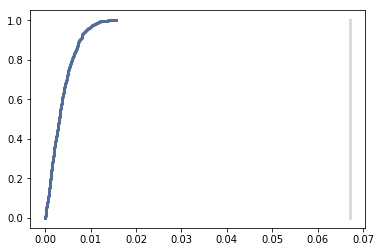

In [177]:
data = young.numfatal.values, rest.numfatal.values
ht = DiffMeansPermute(data)

pvalue = ht.PValue()
ht.PlotCdf()

print('The pvalue is: ', pvalue)

The observed difference in means never intersects: p is less than .001 and so we can conclude that the difference in number of fatalities is statistically significant!

- For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [231]:
def printSummary(results, variable):
    print('Intercept: ',results.params['Intercept'])
    print('Slope: ', results.params[variable])
    print('Slope p-value: ', results.pvalues[variable])
    print('R^2 Value: ', results.rsquared)
    print('R^2 p-value: ', results.f_pvalue, '\n')

In [236]:
diffFatal = young.numfatal.mean() - rest.numfatal.mean()
cleancrashdata['isYoung'] = cleancrashdata.age <= 25

formula1 = 'numfatal ~ isYoung'
results1 = smf.ols(formula1, data = cleancrashdata).fit()

formula2 = 'numfatal ~ dayofweek'
results2 = smf.ols(formula2, data = cleancrashdata).fit()

formula3 = 'numfatal ~ holiday'
results3 = smf.ols(formula3, data = cleancrashdata).fit()

formula4 = 'numfatal ~ sex'
results4 = smf.ols(formula4, data = cleancrashdata).fit()

formula5 = 'numfatal ~ age'
results5 = smf.ols(formula5, data = cleancrashdata).fit()

In [237]:
#results1.summary()
print('Results for ', formula1)
printSummary(results1, 'isYoung[T.True]')

print('Results for ', formula2)
printSummary(results2, 'dayofweek')

print('Results for ', formula3)
printSummary(results3, 'holiday')

print('Results for ', formula4)
printSummary(results4, 'sex')

print('Results for ', formula5)
printSummary(results5, 'age')

Results for  numfatal ~ isYoung
Intercept:  1.1575600419830092
Slope:  0.06706874942108798
Slope p-value:  7.551945523857323e-51
R^2 Value:  0.003109534787788193
R^2 p-value:  7.551945525706778e-51 

Results for  numfatal ~ dayofweek
Intercept:  1.1803521881626788
Slope:  -0.00020389962627579577
Slope p-value:  0.8380349244584624
R^2 Value:  5.78484511404298e-07
R^2 p-value:  0.838034924346366 

Results for  numfatal ~ holiday
Intercept:  1.1773492406048536
Slope:  0.004028090829848632
Slope p-value:  0.0006334403227319641
R^2 Value:  0.00016162958375298686
R^2 p-value:  0.0006334403228341233 

Results for  numfatal ~ sex
Intercept:  1.1241843524812754
Slope:  0.04124561830046275
Slope p-value:  1.2043106129347001e-20
R^2 Value:  0.0012009542863884448
R^2 p-value:  1.2043106128698215e-20 

Results for  numfatal ~ age
Intercept:  1.2397812804430988
Slope:  -0.0015651594824721247
Slope p-value:  1.5445703596346666e-51
R^2 Value:  0.0031531524125256727
R^2 p-value:  1.5445703597005727e-51

In [238]:
formulam = 'numfatal ~ isYoung + dayofweek + holiday + sex'
resultsm = smf.ols(formulam, data = cleancrashdata).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numfatal   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     76.82
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           4.02e-65
Time:                        22:20:57   Log-Likelihood:                -61015.
No. Observations:               72230   AIC:                         1.220e+05
Df Residuals:                   72225   BIC:                         1.221e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1074      0.008    145.477      0.000       1.093       1.122
isYoung[T.True]     0.0646      0.004     14.450      0.000       0.056       0.073
dayofweek          -0.0003      0.001     -0.325      0.745      -0.002       0.002
holiday             0.0037      0.001      3.105      0.002       0.001       0.006
sex                 0.0375      0.004      8.468      0.000       0.029       0.046
==============================================================================
Omnibus:                    70971.312   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4092038.966
Skew:                           4.839   Prob(JB):                         0.00
Kurtosis:                      38.581   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Day of Week looks to be the only variable that doesn't have some significance that we can find. We ran numfatal versus the other variables, and used isYoung instead of age - this lets us show that youth has some significance attached to it.